In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt('kmeans.txt', delimiter=' ')

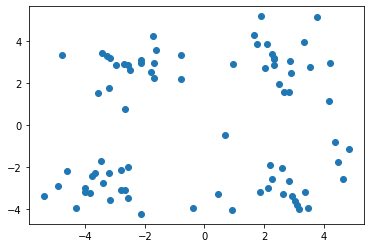

(80, 2)

In [6]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

data.shape

In [32]:
# train 

# 欧几里得距离
def eucDistance(vector1, vector2):
    return np.sqrt(sum((vector1 - vector2) ** 2))


def initCentroids(data, k):
    numSamples, dim = data.shape
    
    # k个质心，每个dim维
    centroids = np.zeros((k, dim))
    # 随机选出k个质心
    for i in range(k):
        # 随机选择索引
        index = int(np.random.uniform(0, numSamples))
        # 作为初始化的质心
        centroids[i, :] = data[index, :]
        
    return centroids

def kmeans(data, k):
    # calculate the number of samples
    numSamples = data.shape[0]
    
    # sample的属性，第一列放属于哪个簇，第二列放误差
    clusterData = np.array(np.zeros((numSamples, 2)))
    
    # judege whether the core need to change
    clusterChanged = True
    
    # init
    centroids = initCentroids(data, k)
    
    while clusterChanged:
        clusterChanged = False
        
        # loop every sample
        for i in range(numSamples):
            # define the minimize distance
            minDist = 1000000.0
            # define the kind 
            minIndex = 0
            
            # loop for calculating the distance between core and samble
            for j in range(k):
                distance = eucDistance(centroids[j, :], data[i, :])
                
                # update
                if distance < minDist:
                    minDist = distance
                    clusterData[i, 1] = minDist
                    minIndex = j
            if clusterData[i, 0] != minIndex:
                # recalculate the core 
                clusterChanged = True
                clusterData[i, 0] = minIndex
        
        # update cores
        for j in range(k):
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            
            # all the suitablbe samples
            pointsInCluster = data[cluster_index]
            
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)
            
    return centroids, clusterData


def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    
    if dim != 2:
        print('Dimensions of your data is not two!')
        return 1
    
    # labels
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    
    if k > len(mark):
        print('Your k is too large!')
        return 1
    
    for i in range(numSamples):
        markIndex = int(clusterData[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])
        
        
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb'] 
    
    # draw the core
    
    
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)
        
    plt.show()

Cluster complete!


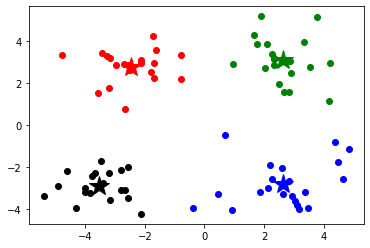

In [33]:
k = 4
centroids, clusterData = kmeans(data, k)

if np.isnan(centorids).any():
    print('error')
else:
    print('Cluster complete!')
    
showCluster(data, k, centroids, clusterData)

In [34]:
centroids

array([[-2.46154315,  2.78737555],
       [ 2.65077367, -2.79019029],
       [ 2.6265299 ,  3.10868015],
       [-3.53973889, -2.89384326]])

In [19]:
# predict


x_test = [0, 1]
np.tile(x_test, (k, 1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [35]:
np.tile(x_test, (k, 1)) - centroids

array([[ 2.46154315, -1.78737555],
       [-2.65077367,  3.79019029],
       [-2.6265299 , -2.10868015],
       [ 3.53973889,  3.89384326]])

In [42]:
((np.tile(x_test, (k, 1)) - centroids) ** 2).sum(axis = 1)

array([ 9.25390604, 21.39214343, 11.34519129, 27.6917668 ])

In [41]:
np.argmin(((np.tile(x_test, (k, 1)) - centroids) ** 2).sum(axis = 1))

0

In [40]:
def predict(datas):
    return np.array([np.argmin(((np.tile(x_test, (k, 1)) - centroids) ** 2).sum(axis = 1)) for data in datas])

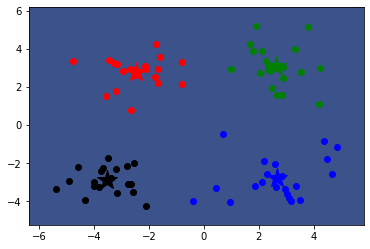

In [43]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)  